In [1]:
!nvidia-smi

Fri Mar 24 20:22:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:03:00.0 Off |                    0 |
| N/A   35C    P0    49W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# !kaggle competitions download -c ss3-final-ds-asset-price-prediction

In [3]:
# !unzip ss3-final-ds-asset-price-prediction.zip

In [5]:
import random
import pandas as pd

In [16]:
LI = []
for i in range(251):
    if i < 80:
        value = random.uniform(8000, 8500)
        LI.append(value)
    elif i >= 80 and i < 170:
        value = random.uniform(7800, 8000)
        LI.append(value)
    elif i >= 170:
        value = random.uniform(7600, 7900)
        LI.append(value)

In [17]:
Rsubmission = pd.read_csv("sample_submission.csv")

In [18]:
Rsubmission = Rsubmission.drop(columns={"predicted"})

In [19]:
Rsubmission["predicted"] = LI

In [20]:
Rsubmission.to_csv("Rsubmission_p2.csv", index=False)

### import library

In [3]:
import pandas as pd
import numpy as np
# from pycaret.regression import *
from datetime import datetime

In [2]:
# from pycaret.time_series import *
from prophet import Prophet

In [5]:
data = pd.read_csv("price_prediction_data.csv")

In [6]:
data.head()

,Date,A,B,C
0,5/1/2013,248.229996,106.250000,904.093817
1,5/2/2013,252.550003,98.099998,901.763325
2,5/3/2013,258.049988,112.900002,996.998207
3,5/6/2013,255.720001,109.599998,894.422647
4,5/7/2013,257.730011,113.199997,882.606339


<AxesSubplot: >

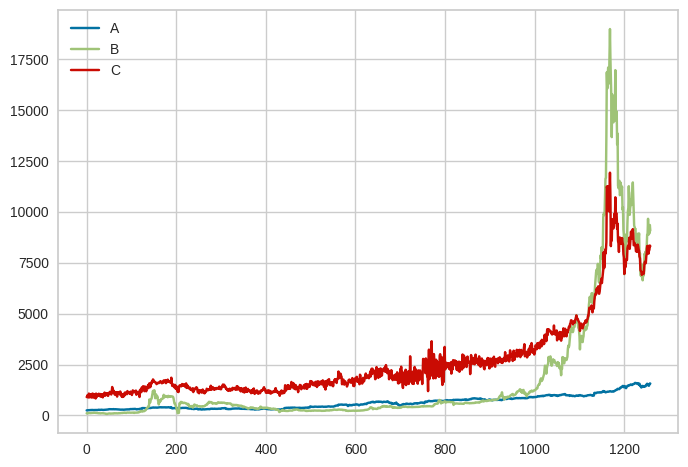

In [7]:
data.plot()

In [8]:
data.dtypes

Date     object
A       float64
B       float64
C       float64
dtype: object

In [9]:
data["date"] = pd.to_datetime(data.Date)

In [10]:
data.head()

,Date,A,B,C,date
0,5/1/2013,248.229996,106.250000,904.093817,2013-05-01
1,5/2/2013,252.550003,98.099998,901.763325,2013-05-02
2,5/3/2013,258.049988,112.900002,996.998207,2013-05-03
3,5/6/2013,255.720001,109.599998,894.422647,2013-05-06
4,5/7/2013,257.730011,113.199997,882.606339,2013-05-07


In [11]:
data = data.drop(columns={"Date", "A","B"})

In [13]:
future_dates = pd.date_range(start='2018-05-01', end = '2019-01-06', freq = 'D')

In [15]:
future_df = pd.DataFrame()
future_df["ds"] = future_dates

In [16]:
data = data.rename(columns={"date":"ds", "C":"y"})

In [17]:
data.head()

,y,ds
0,904.093817,2013-05-01
1,901.763325,2013-05-02
2,996.998207,2013-05-03
3,894.422647,2013-05-06
4,882.606339,2013-05-07


In [18]:
m = Prophet()

In [19]:
m.fit(data)

18:38:48 - cmdstanpy - INFO - Chain [1] start processing
18:38:49 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
forecast = m.predict(future_df)

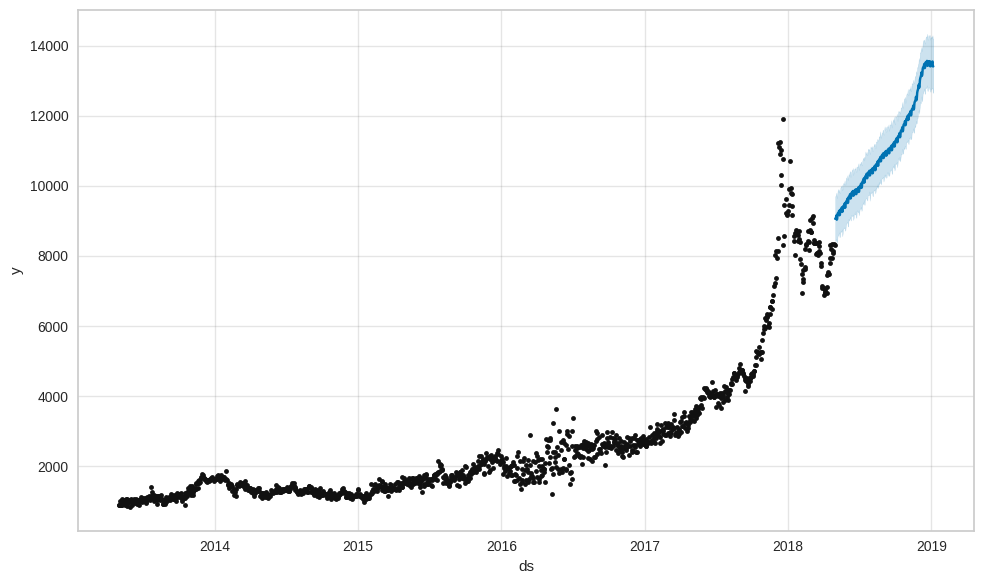

In [24]:
fig1 = m.plot(forecast)

In [25]:
train_forecast = m.predict(data[["ds"]])

In [26]:
train_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-05-01,1077.401624,350.883647,1663.445303,1077.401624,1077.401624,-58.288746,-58.288746,-58.288746,24.525007,24.525007,24.525007,-82.813753,-82.813753,-82.813753,0.0,0.0,0.0,1019.112878
1,2013-05-02,1078.251362,392.084239,1682.227153,1078.251362,1078.251362,-49.489250,-49.489250,-49.489250,22.104581,22.104581,22.104581,-71.593831,-71.593831,-71.593831,0.0,0.0,0.0,1028.762112
2,2013-05-03,1079.101100,447.086598,1718.658607,1079.101100,1079.101100,-5.426887,-5.426887,-5.426887,56.318427,56.318427,56.318427,-61.745314,-61.745314,-61.745314,0.0,0.0,0.0,1073.674213
3,2013-05-06,1081.650314,439.256545,1738.443162,1081.650314,1081.650314,-8.900392,-8.900392,-8.900392,31.698089,31.698089,31.698089,-40.598481,-40.598481,-40.598481,0.0,0.0,0.0,1072.749922
4,2013-05-07,1082.500052,435.429161,1724.608882,1082.500052,1082.500052,3.698115,3.698115,3.698115,39.971403,39.971403,39.971403,-36.273288,-36.273288,-36.273288,0.0,0.0,0.0,1086.198167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-04-24,8997.502423,8189.851045,9467.512495,8997.502423,8997.502423,-156.625184,-156.625184,-156.625184,39.971403,39.971403,39.971403,-196.596588,-196.596588,-196.596588,0.0,0.0,0.0,8840.877239
1255,2018-04-25,9013.176952,8233.038703,9549.515084,9013.176952,9013.176952,-154.017866,-154.017866,-154.017866,24.525007,24.525007,24.525007,-178.542873,-178.542873,-178.542873,0.0,0.0,0.0,8859.159086
1256,2018-04-26,9028.851480,8224.182092,9536.688756,9028.851480,9028.851480,-138.852865,-138.852865,-138.852865,22.104581,22.104581,22.104581,-160.957446,-160.957446,-160.957446,0.0,0.0,0.0,8889.998615
1257,2018-04-27,9044.526008,8343.343555,9565.267166,9044.526008,9044.526008,-87.701372,-87.701372,-87.701372,56.318427,56.318427,56.318427,-144.019800,-144.019800,-144.019800,0.0,0.0,0.0,8956.824636


In [29]:
submission_df_prophet = forecast[["yhat"]]

In [30]:
submission_df_prophet

,yhat
0,9061.368581
1,9073.151645
2,9096.601001
3,9155.287945
4,9034.726824
...,...
246,13518.744058
247,13516.308953
248,13551.378800
249,13409.475413


In [128]:
day_list = []
for i in range(1,252):
    day_list.append(i)

In [130]:
submission_df_prophet["day"] = day_list

In [131]:
submission_df_prophet = submission_df_prophet.rename(columns={"yhat":"predicted"})

In [134]:
submission_df_prophet2 = pd.DataFrame()

In [135]:
submission_df_prophet2["day"] = submission_df_prophet[["day"]]
submission_df_prophet2["predicted"] = submission_df_prophet[["predicted"]]

In [136]:
submission_df_prophet2.to_csv("submission_df_prophet.csv", index=False)

### PyCaret Time Series

In [1]:
from pycaret.time_series import *
from pycaret.time_series import TSForecastingExperiment
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
new_df = pd.read_csv("price_prediction_data.csv")

In [4]:
# # convert the 'date' column to datetime format
data_train = pd.DataFrame()
data_train['date'] = pd.to_datetime(new_df['Date'])

# extract the date components and store them in new columns
data_train['Month'] = data_train['date'].dt.month
data_train['Day'] = data_train['date'].dt.day
data_train['Year'] = data_train['date'].dt.year

# print the updated dataframe
data_train
data_train["C"] = new_df["C"]
# data_train = data_train.drop(columns="date")
data_train.head()

,date,Month,Day,Year,C
0,2013-05-01,5,1,2013,904.093817
1,2013-05-02,5,2,2013,901.763325
2,2013-05-03,5,3,2013,996.998207
3,2013-05-06,5,6,2013,894.422647
4,2013-05-07,5,7,2013,882.606339


In [5]:
# new_df = new_df.drop(columns={"A","B"})

In [6]:
# new_df.head()

In [7]:
# new_df = new_df.rename(columns={"Date":"date"})

In [8]:
# new_df["date"] = pd.to_datetime(new_df.date)

In [9]:
new_df

,Date,A,B,C
0,5/1/2013,248.229996,106.250000,904.093817
1,5/2/2013,252.550003,98.099998,901.763325
2,5/3/2013,258.049988,112.900002,996.998207
3,5/6/2013,255.720001,109.599998,894.422647
4,5/7/2013,257.730011,113.199997,882.606339
...,...,...,...,...
1254,4/24/2018,1460.089966,8873.620117,7943.190096
1255,4/25/2018,1460.170044,9282.120117,8088.101937
1256,4/26/2018,1517.959961,8938.469727,8133.063247
1257,4/27/2018,1572.619995,9351.469727,8344.090250


In [44]:
exp = TSForecastingExperiment()

In [45]:
fig_kwargs={'renderer': 'notebook'}
forecast_horizon = 3
fold = 3

In [46]:
exp.setup(data_train["C"],fh=forecast_horizon, fold=fold, fig_kwargs=fig_kwargs, session_id=123, use_gpu=True)

,Description,Value
0,session_id,123
1,Target,C
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1259, 1)"
5,Transformed data shape,"(1259, 1)"
6,Transformed train set shape,"(1256, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with

In [47]:
# best = exp.compare_models()

In [49]:
final_model = exp.create_model("naive")

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1246.0000,0.4703,0.3083,130.5749,158.8260,0.0170,0.0171,-0.0739
1,1249.0000,1.2173,0.7252,338.4009,373.4631,0.0412,0.0422,-4.5880
2,1252.0000,0.5811,0.3361,162.7935,173.9827,0.0201,0.0200,-0.1912
Mean,nan,0.7563,0.4565,210.5898,235.4239,0.0261,0.0265,-1.6177
SD,nan,0.3292,0.1903,91.3282,97.8043,0.0107,0.0112,2.1009


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
tuned_model = exp.tune_model(final_model)
tuned_model

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1246.0000,0.4703,0.2965,130.5749,152.7376,0.0170,0.0171,0.0069
1,1249.0000,1.1776,0.7033,327.3476,362.2024,0.0398,0.0408,-4.2561
2,1252.0000,0.6088,0.3508,170.5528,181.6254,0.0211,0.0210,-0.2982
Mean,nan,0.7522,0.4502,209.4917,232.1885,0.0260,0.0263,-1.5158
SD,nan,0.3060,0.1803,84.9198,92.6871,0.0099,0.0104,1.9417


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.3s finished


NaiveForecaster(strategy='drift')

In [41]:
pred_arima_df = exp.predict_model(exp.finalize_model(final_model), fh = 251)

In [42]:
pred_arima_df

,y_pred
1259,8078.0993
1260,7942.5046
1261,8175.3448
1262,8228.9463
1263,8552.9875
...,...
1505,9889.7953
1506,9478.6279
1507,9604.8522
1508,9635.6792


In [32]:
day_list = []
for i in range(1,252):
    day_list.append(i)

In [33]:
pred_list = []
for i in pred_arima_df["y_pred"]:
    pred_list.append(i)

In [34]:
submission_df_arima = pd.DataFrame()
submission_df_arima["day"] = day_list
submission_df_arima["predicted"] = pred_list

In [35]:
submission_df_arima

,day,predicted
0,1,8309.0395
1,2,8309.0395
2,3,8309.0395
3,4,8309.0395
4,5,8309.0395
...,...,...
246,247,8309.0395
247,248,8309.0395
248,249,8309.0395
249,250,8309.0395


In [36]:
submission_df_arima.to_csv("submission_df_naive2.csv", index=False)

### PyCaret Regression

In [133]:
from pycaret.regression import *

In [137]:
new_df2 = pd.read_csv("price_prediction_data.csv")

In [138]:
# # convert the 'date' column to datetime format
data_train = pd.DataFrame()
data_train['date'] = pd.to_datetime(new_df2['Date'])

# extract the date components and store them in new columns
data_train['Month'] = data_train['date'].dt.month
data_train['Day'] = data_train['date'].dt.day
data_train['Year'] = data_train['date'].dt.year

# print the updated dataframe
data_train
data_train["C"] = new_df["C"]
data_train = data_train.drop(columns="date")
data_train.head()

,Month,Day,Year,C
0,5,1,2013,904.093817
1,5,2,2013,901.763325
2,5,3,2013,996.998207
3,5,6,2013,894.422647
4,5,7,2013,882.606339


In [163]:
s = setup(data = data_train, target = 'C', 
          fold_strategy = 'timeseries', 
          numeric_features = ['Year', 'Month', 'Day'],
          fold = 5, transform_target = True, session_id = 123, use_gpu=True)

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recomp

,Description,Value
0,Session id,123
1,Target,C
2,Target type,Regression
3,Original data shape,"(1259, 5)"
4,Transformed data shape,"(1259, 4)"
5,Transformed train set shape,"(881, 4)"
6,Transformed test set shape,"(378, 4)"
7,Numeric features,3
8,Date features,1
9,Rows with missing values,80.1%


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


In [164]:
best = compare_models(sort = 'MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1225.9125,4555821.1247,2114.6582,-0.0150,0.5543,0.3755,0.1260
rf,Random Forest Regressor,1225.6506,4550440.5356,2113.4546,-0.0138,0.5540,0.3760,0.1580
gbr,Gradient Boosting Regressor,1227.1357,4556413.9789,2114.7964,-0.0151,0.5544,0.3762,0.0920
xgboost,Extreme Gradient Boosting,1231.3124,4582117.1500,2120.1648,-0.0200,0.5563,0.3765,0.5300
catboost,CatBoost Regressor,1228.2798,4557760.3165,2115.0085,-0.0153,0.5548,0.3773,4.4680
dt,Decision Tree Regressor,1228.2468,4556525.2384,2114.8334,-0.0152,0.5547,0.3775,0.0400
lightgbm,Light Gradient Boosting Machine,1230.5532,4561336.9195,2115.7915,-0.0160,0.5553,0.3783,0.0620
ada,AdaBoost Regressor,1231.1570,4550805.8270,2111.9181,-0.0117,0.5555,0.3816,0.0520
huber,Huber Regressor,1377.2513,5234664.9682,2266.5780,-0.1661,0.6336,0.4296,0.0480
llar,Lasso Least Angle Regression,1363.8020,5098441.2000,2237.8241,-0.1371,0.6258,0.4413,0.0400


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [165]:
forecast_time = pd.date_range(start='2018-05-01', end = '2019-01-06', freq = 'D')

In [166]:
forecast_df = pd.DataFrame()
forecast_df["date"] = forecast_time

In [167]:
forecast_df

,date
0,2018-05-01
1,2018-05-02
2,2018-05-03
3,2018-05-04
4,2018-05-05
...,...
246,2019-01-02
247,2019-01-03
248,2019-01-04
249,2019-01-05


In [172]:
# # convert the 'date' column to datetime format
forecast_df2 = pd.DataFrame()
forecast_df2['date'] = pd.to_datetime(forecast_df['date'])

# extract the date components and store them in new columns
forecast_df2['Month'] = forecast_df['date'].dt.month
forecast_df2['Day'] = forecast_df['date'].dt.day
forecast_df2['Year'] = forecast_df['date'].dt.year

# print the updated dataframe
forecast_df2 = forecast_df2.drop(columns={"date"})
forecast_df2

,Month,Day,Year
0,5,1,2018
1,5,2,2018
2,5,3,2018
3,5,4,2018
4,5,5,2018
...,...,...,...
246,1,2,2019
247,1,3,2019
248,1,4,2019
249,1,5,2019


In [173]:
predictions = predict_model(best, data=forecast_df2)

KeyError: "['date'] not in index"

In [158]:
submission_df_regress = pd.DataFrame()
submission_df_regress["day"] = day_list
submission_df_regress["predicted"] = predictions[['prediction_label']]

In [159]:
submission_df_regress

,day,predicted
0,1,7127.676480
1,2,7073.315328
2,3,7007.891530
3,4,6948.426498
4,5,7019.962741
...,...,...
246,247,9285.974143
247,248,9899.041199
248,249,9449.686437
249,250,10709.051249
